# Imports

In [108]:
%load_ext autoreload
%autoreload 2

import aidictive
import aidictive.trainer

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import PIL

import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Prepare data

(400, 400, 3)

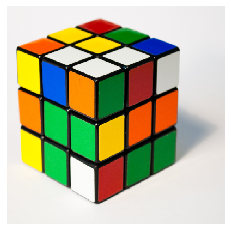

In [110]:
# Load and show the image the network is going to paint.
image_path = "input/rubik.jpg"
img = PIL.Image.open(image_path)
# Resize image to a fixed size.
W, H = 400, 400
img = img.resize((W, H))
# Convert img to a numpy array so we can deal with it as any other array.
img = np.array(img)
# Plot image.
plt.axis("off")
plt.imshow(img)
# Check the shape of the image. It should have 3 channels.
img.shape

In [111]:
# Create input and target arrays.
train_X = np.array(list(np.ndindex(img.shape[0:2])))
train_Y = img.reshape(-1, 3)
n_pixels = len(train_X)

In [112]:
# Normalizing input and output.
train_X = (train_X - np.mean(train_X)) / np.std(train_X)
train_Y = train_Y / 255.

# Model definition

In [136]:
neurons, n_layers = 20, 7
layers = [2] + [neurons,] * n_layers + [3]
model = aidictive.models.FFNN(layers, activations="relu", last_activation=None)
model

FFNN(
  (seq): Sequential(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=20, bias=True)
    (5): ReLU()
    (6): Linear(in_features=20, out_features=20, bias=True)
    (7): ReLU()
    (8): Linear(in_features=20, out_features=20, bias=True)
    (9): ReLU()
    (10): Linear(in_features=20, out_features=20, bias=True)
    (11): ReLU()
    (12): Linear(in_features=20, out_features=20, bias=True)
    (13): ReLU()
    (14): Linear(in_features=20, out_features=3, bias=True)
  )
)

# Training

In [ ]:
trainer = aidictive.trainer.Trainer(model)
trainer.fit(train_X, train_Y,
            optimizer="sgd",
            optimizer_params={
                "lr": 0.001,
                "momentum": 0.9,
            },
            n_epochs=20,
            batch_size=5,
            log_epoch_interval=1)

Epoch 1 ended in 33.9659s. Batches: 32000.
Metric:	0.17322618402379886
Loss:	0.17322618379433696
epoch:	1
Epoch 2 ended in 35.8388s. Batches: 32000.
Metric:	0.14545233669918525
Loss:	0.14545233666808052
epoch:	2


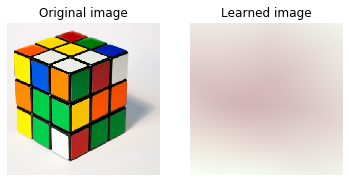

In [138]:
# Run predictions over all pixels.
pred = trainer.predict(train_X)
# Reshape and cast predictions.
pred_img = pred.numpy().reshape(W, H, 3).clip(0, 1)
# Plot original image on the left.
plt.subplot(121)
plt.axis("off")
plt.title("Original image")
plt.imshow(img)
# Plot learned image on the right.
plt.subplot(122)
plt.axis("off")
plt.title("Learned image")
plt.imshow(pred_img)